In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline




# 加载数据集 

In [4]:
vehicle_id=1
data_root='./'
dataset=pd.read_csv(data_root+'perfect_%d.csv'% vehicle_id)
header=dataset.columns.values.tolist()
dataset.describe()

,vehicle_id,charge_start_time,charge_end_time,charge_duration,mileage,delta_mileage,charge_start_soc,charge_end_soc,charge_delta_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_energy
count,162.0,1.620000e+02,1.620000e+02,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,1.0,2.020000e+13,2.020000e+13,15883.666667,77945.406173,123.654938,43.360494,90.997531,47.637037,366.024074,394.508025,-16.294444,-15.526543,14.333333,7.672840,16.211284
std,0.0,0.000000e+00,0.000000e+00,10978.078015,6585.411095,393.165645,15.410408,19.314629,17.782778,4.556884,7.131550,11.866594,14.030844,3.735011,4.505111,5.349017
min,1.0,2.020000e+13,2.020000e+13,750.000000,69180.200000,19.700000,10.400000,19.200000,4.000000,357.200000,372.800000,-41.300000,-41.200000,7.000000,-2.000000,3.209000
25%,1.0,2.020000e+13,2.020000e+13,2932.500000,73095.425000,72.100000,34.000000,93.200000,32.900000,362.450000,389.025000,-29.275000,-15.900000,12.000000,4.250000,11.378750
50%,1.0,2.020000e+13,2.020000e+13,21204.500000,76811.650000,89.100000,39.200000,100.000000,48.600000,365.650000,398.200000,-7.700000,-7.700000,14.000000,7.000000,18.266500
75%,1.0,2.020000e+13,2.020000e+13,26070.500000,81057.450000,106.525000,56.800000,100.000000,64.800000,370.075000,399.700000,-7.600000,-7.600000,16.000000,10.000000,20.926000
max,1.0,2.020000e+13,2.020000e+13,29989.000000,94630.700000,5078.300000,75.200000,100.000000,70.800000,377.600000,401.600000,-0.800000,-1.800000,29.000000,23.000000,24.043000


D:\anaconda-a\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


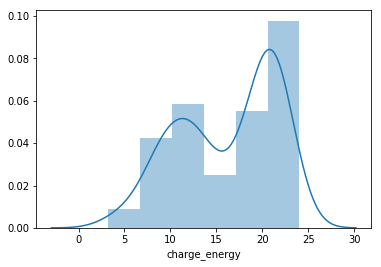

In [6]:
sns.distplot(dataset['charge_energy']);

# 特征选择

In [10]:
features=['charge_duration', 'charge_start_soc', 'charge_start_U']
X=dataset[header[3:14]]
y=dataset[header[15]]

# 将数据区分为训练集和测试集

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(121, 11)
(121,)
(41, 11)
(41,)


# 数据标准化

In [13]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled=scaler.fit_transform(X_test.astype(np.float64))
X_train_scaled

array([[0.12346523, 0.53257107, 0.01120863, ..., 0.29135802, 1.        ,
        0.40909091],
       [0.05437942, 0.30466592, 0.01031906, ..., 0.27160494, 0.0128866 ,
        0.31818182],
       [0.07489996, 0.35387517, 0.01622979, ..., 0.37037037, 0.01546392,
        0.36363636],
       ...,
       [0.91360854, 0.05619929, 0.0268256 , ..., 0.83209877, 0.86082474,
        0.54545455],
       [0.07934608, 0.33830377, 0.01342269, ..., 0.37037037, 0.97680412,
        0.5       ],
       [0.14022367, 0.37810652, 0.02648954, ..., 0.29876543, 0.97680412,
        0.5       ]])

# 参数选择

In [14]:
from sklearn.feature_selection import VarianceThreshold
#设置方差的阈值为0.08
sel=VarianceThreshold(threshold=0.08)
X_sel=sel.fit_transform(X_train.astype(np.float64))
X_sel.shape

(121, 11)




# 非线性回归SVM-linear

In [25]:
import time
from sklearn.svm import SVR
l_svr=SVR(kernel='linear')
#记录训练开始时间
time_start=time.clock()
l_svr.fit(X_train_scaled,y_train)
#记录训练结束时间
time_end=time.clock()
print('Running time: %s Seconds'%(time_end-time_start))
#返回预测性能得分，值不超过1，值越大性能越好
l_svr.score(X_test_scaled,y_test) 

Running time: 0.0014631497617756395 Seconds


0.8898987589568146

# 预测结果并评价

In [26]:
y_pred=l_svr.predict(X_test_scaled)

#评估模型
from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# 用scikit-learn计算MAE
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
# 计算精确度
# for i in range(len(y_pred)):
#     if y_pred[i] < 0:
#         y_pred[i] = 0.4

error_array = np.array(((y_test - y_pred) / y_test))
error_rate = np.sqrt(np.sum(np.power(error_array,2)))
print("error_rate: %f" % error_rate)

MSE: 2.601377909454787
RMSE: 1.6128787646487217
MAE: 1.2818432868833574
error_rate: 0.995415


# 真实值与预测值越接近y=x表明预测越准确

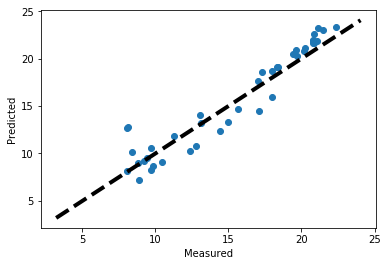

In [27]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()



# 非线性回归SVM-rbf

In [30]:
import time
from sklearn.svm import SVR
l_svr=SVR(kernel='rbf')
#记录训练开始时间
time_start=time.clock()
l_svr.fit(X_train_scaled,y_train)
#记录训练结束时间
time_end=time.clock()
print('Running time: %s Seconds'%(time_end-time_start))
l_svr.score(X_test_scaled,y_test)

Running time: 0.0011818734922144358 Seconds


0.7864797002853265

MSE: 5.044874931791653
RMSE: 2.2460799032518084
MAE: 1.73905022008096
error_rate: 1.413304


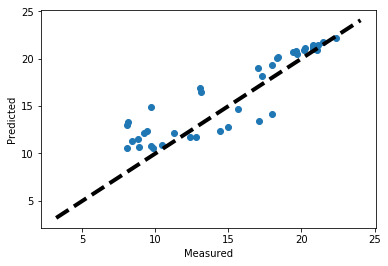

In [32]:
y_pred=l_svr.predict(X_test_scaled)

#预测结果并进行评价
#评估模型
from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# 用scikit-learn计算MAE
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
# 计算精确度
# for i in range(len(y_pred)):
#     if y_pred[i] < 0:
#         y_pred[i] = 0.4

error_array = np.array(((y_test - y_pred) / y_test))
error_rate = np.sqrt(np.sum(np.power(error_array,2)))
print("error_rate: %f" % error_rate)

#真实值和预测值差距
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()




# 非线性回归SVR-poly

In [33]:
import time
from sklearn.svm import SVR
l_svr=SVR(kernel='poly')
#记录训练开始时间
time_start=time.clock()
l_svr.fit(X_train_scaled,y_train)
#记录训练结束时间
time_end=time.clock()
print('Running time: %s Seconds'%(time_end-time_start))
l_svr.score(X_test_scaled,y_test)

Running time: 0.0010725060947152087 Seconds


0.20796498135221564

MSE: 18.713525674218367
RMSE: 4.32591327631731
MAE: 3.2651523480530535
error_rate: 2.979406


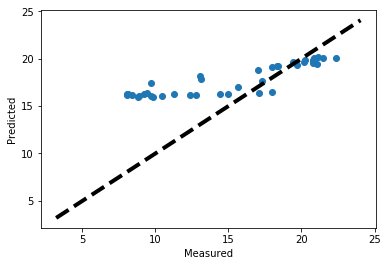

In [34]:
y_pred=l_svr.predict(X_test_scaled)

#预测结果并进行评价
#评估模型
from sklearn import metrics
# 用scikit-learn计算MSE
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
# 用scikit-learn计算RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# 用scikit-learn计算MAE
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
# 计算精确度
# for i in range(len(y_pred)):
#     if y_pred[i] < 0:
#         y_pred[i] = 0.4

error_array = np.array(((y_test - y_pred) / y_test))
error_rate = np.sqrt(np.sum(np.power(error_array,2)))
print("error_rate: %f" % error_rate)

#真实值和预测值差距
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()